In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data = pd.read_csv('housing1.csv', delim_whitespace=True, header=None)
column = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'PRICE']
data.columns = column
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


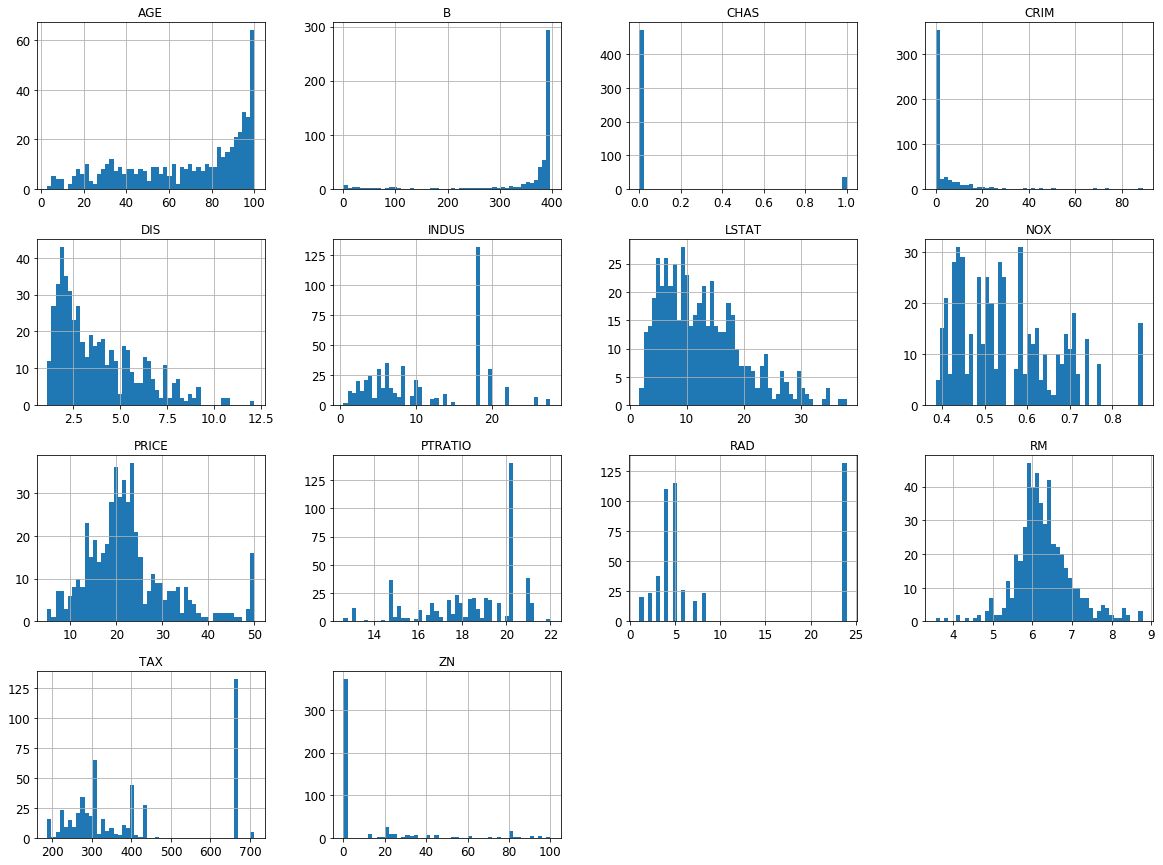

In [2]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Things to notice
- Price and age are capped

In [3]:
corr_matrix = data.corr()
corr_matrix['PRICE'].sort_values(ascending=False)

PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

# The most correlated attribute (negative) is LSTAT, lower status % of population

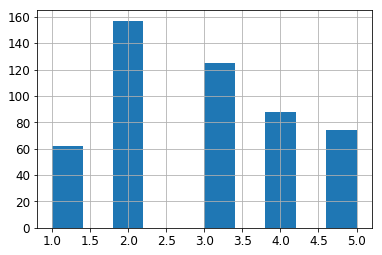

In [4]:
data['LSTAT_CAT'] = pd.cut(data['LSTAT'], bins=[0,5,10,15,20,np.inf], labels = [1,2,3,4,5])
data['LSTAT_CAT'].hist()

In [5]:
data['LSTAT_CAT'].value_counts() / len(data)

2    0.310277
3    0.247036
4    0.173913
5    0.146245
1    0.122530
Name: LSTAT_CAT, dtype: float64

# Stratify our test set:

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['LSTAT_CAT']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [7]:
strat_test_set['LSTAT_CAT'].value_counts() / len(strat_test_set)

2    0.313725
3    0.245098
4    0.176471
5    0.147059
1    0.117647
Name: LSTAT_CAT, dtype: float64

In [8]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('LSTAT_CAT', axis=1, inplace=True)

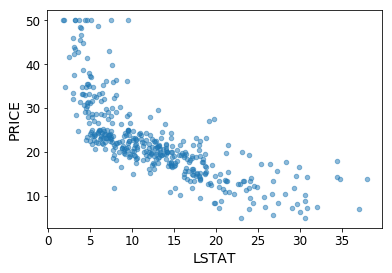

In [9]:
housing = strat_train_set.copy()

housing.plot(kind="scatter", x="LSTAT", y="PRICE", alpha=0.5)

# Separate training set into predictors and the labels

In [10]:
housing = strat_train_set.drop("PRICE", axis=1)
housing_labels = strat_train_set['PRICE'].copy()

# Our data has no missing values or text, so we do not have to clean this via transformer! Go straight to feature scaling, unless you want to combine attributes

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

housing_tr = num_pipeline.fit_transform(housing)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
housing.head(5) # Train set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
230,0.53700,0.0,6.20,0,0.504,5.981,68.1,3.6715,8,307.0,17.4,378.35,11.65
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233.0,17.9,394.46,7.44
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398.0,18.7,394.92,6.78
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666.0,20.2,396.90,31.99
212,0.21719,0.0,10.59,1,0.489,5.807,53.8,3.6526,4,277.0,18.6,390.94,16.03


In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)    # Transformed training data vs training solutions

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
some_data = housing.iloc[0:5]
some_labels = housing_labels.iloc[0:5]
some_data_prepared = num_pipeline.transform(some_data)   

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [24.6657683  24.63822742 24.77785095  6.42394635 20.59318074]
Labels: [24.3, 24.7, 24.1, 7.4, 22.4]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [15]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.476754781576331

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_tr, housing_labels)
housing_predictions = tree_reg.predict(housing_tr)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_tr, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.05231039 4.57946104 3.7257836  3.71742764 3.41730888 5.16664785
 4.74399621 3.55010563 7.2988869  3.84421644]
Mean: 4.409614458029518
Standard deviation: 1.1035926761951966


In [18]:
lin_scores = cross_val_score(lin_reg, housing_tr, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.66059281 4.99464778 3.49823927 3.53081903 5.10647803 6.13899664
 4.74364056 3.78473425 6.42262074 4.17899124]
Mean: 4.605976035151835
Standard deviation: 1.0101691192731206


In [19]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_tr, housing_labels)
housing_predictions = forest_reg.predict(housing_tr)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.344493470816912

In [20]:
forest_scores = cross_val_score(forest_reg, housing_tr, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.62835561 3.50905754 3.1481785  3.26646698 1.92550648 4.71527993
 3.47928672 2.79626036 6.06368305 3.29697793]
Mean: 3.4829053079230095
Standard deviation: 1.0954698603819015


# Summary of current results:
- DecisionTreeRegressor is slightly better than LinReg
- RandomForestRegressor's score on training set is much better than with validation. Overfitting

# Fine Tuning our Model

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'n_estimators': [3,10],'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_tr, housing_labels)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [24]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [27]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

4.669088244882919 {'max_features': 2, 'n_estimators': 3}
4.072978269055461 {'max_features': 2, 'n_estimators': 10}
3.64130318929798 {'max_features': 2, 'n_estimators': 30}
4.21134005258467 {'max_features': 4, 'n_estimators': 3}
3.553021270484438 {'max_features': 4, 'n_estimators': 10}
3.6145158925523835 {'max_features': 4, 'n_estimators': 30}
4.051189573902506 {'max_features': 6, 'n_estimators': 3}
3.6121860581664227 {'max_features': 6, 'n_estimators': 10}
3.5406277218123976 {'max_features': 6, 'n_estimators': 30}
4.008292765141926 {'max_features': 8, 'n_estimators': 3}
3.7783630682145306 {'max_features': 8, 'n_estimators': 10}
3.4196171998016562 {'max_features': 8, 'n_estimators': 30}
4.659775085815306 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.8918815046246724 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.34707044481053 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.6547895132467767 {'bootstrap': False, 'max_features': 3, 'n_estimators'

# Noticed how we trained and built our model on the training set. Only now do we fit it and evaluate it on the test set!

In [30]:
final_model = grid_search.best_estimator_ # This already contains our hyper-parameter-tuned RandomForestRegressor!

X_test = strat_test_set.drop("PRICE", axis=1)
y_test = strat_test_set['PRICE'].copy()

X_test_prepared = num_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3.478329128965769

RMSE = 3.48

In [35]:
print("Predictions:", type(final_predictions))
print("Labels:", type(y_test))

Predictions: <class 'numpy.ndarray'>
Labels: <class 'pandas.core.series.Series'>


In [44]:
strat_test_set['PREDICTION'] = final_predictions
strat_test_set.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRED,PREDICTION
241,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40,20.1,21.26,21.26
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264.0,13.0,384.07,14.79,30.7,28.12,28.12
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256.0,15.1,392.90,3.95,31.6,31.82,31.82
159,1.42502,0.0,19.58,0,0.871,6.510,100.0,1.7659,5,403.0,14.7,364.31,7.39,23.3,30.06,30.06
136,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437.0,21.2,378.25,16.90,17.4,16.95,16.95
